# Oefening 2: Modeloplossing

Importeer alle bibliotheken. Belangrijk: voor het plotten met 'matplotlib' importeer je 'matplotlib.pyplot' en niet gewoon 'matplotlib'!!!

In [48]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Definieer Functies

Je kan voor de definitie van de functies teruggrijpen naar de vorige oefensessies.

In [49]:
def f(x):
    return x**3/(x**2-1)

In [50]:
def g(y):
    return y*sp.exp(-y**2/2)

In [51]:
def h(x):
    return sp.ln(x)/x**2

## Definieer de X-waarden

Stel een array van X-waarden op door gebruik te maken van linspace. We kiezen om tussen $x = -4$ en $x = 4$ 300 punten te genereren.

In [52]:
X = np.linspace(-4,4,300)

# Plot de functie f

De algemene structuur van een plot met 'matplotlib' ziet er als volgt uit:

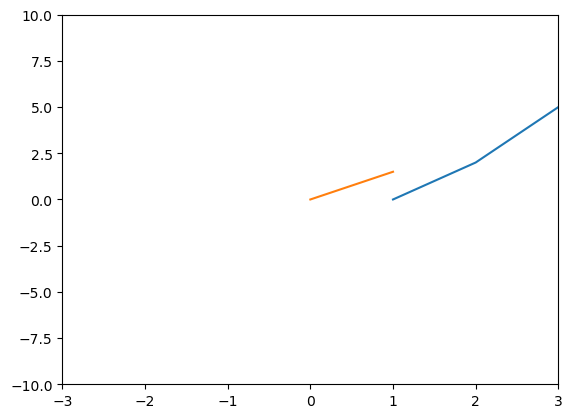

In [53]:
x_vals = [1,2,3]
x2_vals = [0,1.5]
y_vals = [0,2,5]
y2_vals = [2,2]

plt.figure()
plt.plot(x_vals, y_vals)
plt.plot(x2_vals)
plt.xlim([-3,3])
plt.ylim([-10,10])
plt.show()

Voor de functie $f$ en de lijst met x-waarden X, ziet dit er als volgt uit:

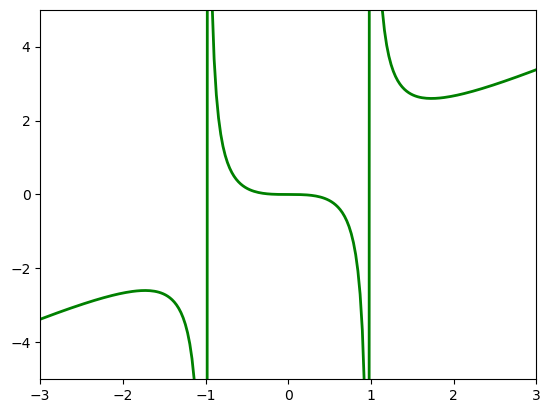

In [54]:
Y = f(X)
plt.figure()
plt.plot(X,Y,'g',linewidth=2)
plt.xlim([-3,3])
plt.ylim([-5,5])
plt.show()

Je ziet dat opties, zoals kleur en lijnbreedte, als opties gescheiden door komma's meegegeven worden met het 'plot' commando. Opties die op alle grafieken op de figuur van toepassing zijn, zoals 'xlim' en 'ylim' worden apart of de figuur uitgevoerd en maken geen deel uit van het 'plot' commando. Deze aanpassingen moeten gebeuren vooraleer de figuur geplot wordt met het plt.show() commando of vooraleer het codeblok uitgevoerd wordt. Eens de figuur geplot is, kan je geen eigenschappen meer aanpassen en moet je een nieuwe plot maken.

## Verwijder de verbindingslijnen bij de verticale asymptoten

Deze code zet de waarden in de Y-lijst die groter zijn dan 10 of kleiner dan -10 om in 'nan' (Not a Number). Het 'plot' commando trekt lijnstukken tussen alle punten in Y, behalve wanneer de waarde 'nan' is.

In [55]:
Y[abs(Y)>10] = 'nan'

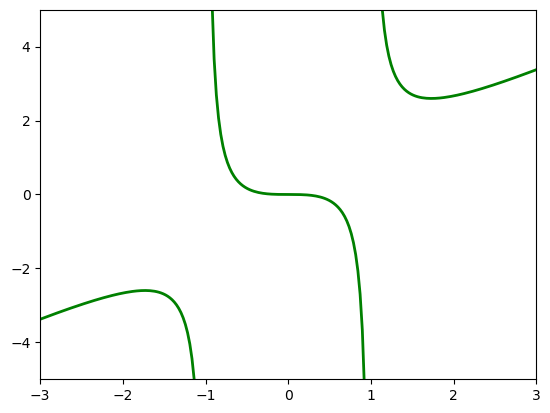

In [56]:
plt.figure()
plt.plot(X,Y,'g',linewidth=2)
plt.xlim([-3,3])
plt.ylim([-5,5])
plt.show()

## Verticale asymptoten

De verticale asymptoten zijn verticale lijnstukken, dus we kunnen deze opstellen door twee punten te definiëren. Het 'plot' commando zal deze dan verbinden. 

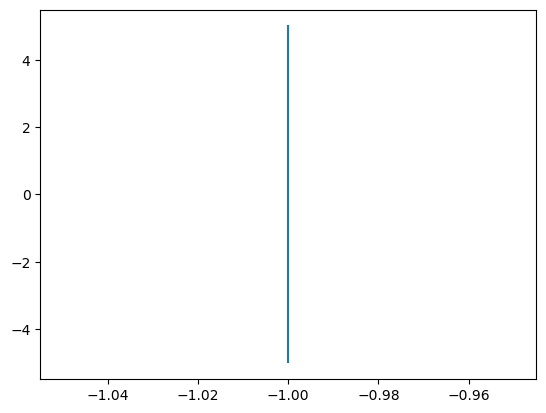

In [57]:
plt.plot([-1,-1],[-5,5])

Om deze plot toe te voegen aan de figuur met de functie, voegen we dit 'plot' commando toe als volgt:

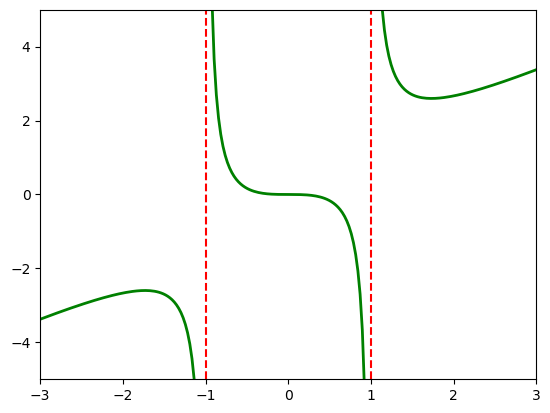

In [58]:
plt.figure()
plt.plot(X,Y,'g',linewidth=2)
plt.plot([-1,-1],[-5,5],'r--')
plt.plot([1,1],[-5,5],'r--')
plt.xlim([-3,3])
plt.ylim([-5,5])
plt.show()

## Schuine asymptoten

$f$ heeft een schuine asymptoot: $y = a*x + b$ met $a=1$ en $b=0$. Om deze te plotten kiezen we opnieuw twee punten op deze rechten: (-4,-4) en (4,4)

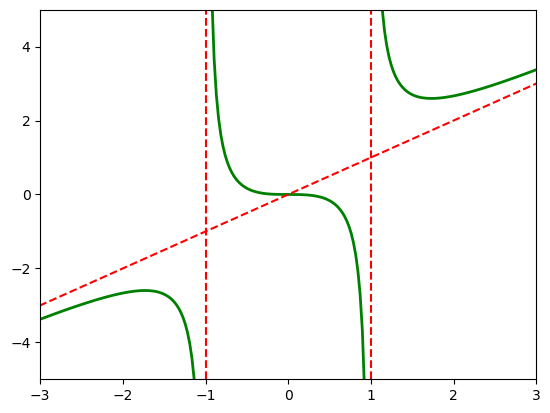

In [59]:
plt.figure()
plt.plot(X,Y,'g',linewidth=2)
plt.plot([-1,-1],[-5,5],'r--')
plt.plot([1,1],[-5,5],'r--')
plt.plot([-4,4],[-4,4],'r--')
plt.xlim([-3,3])
plt.ylim([-5,5])
plt.show()

## Kritieke punten

De drie kritieke punten $x = -\sqrt(3)$, $x = 0$ en $x = \sqrt(3)$ kunnen we met behulp van het 'scatter' commando toevoegen:

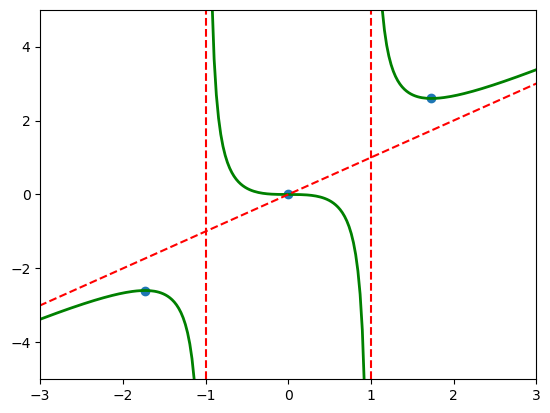

In [60]:
plt.figure()
plt.plot(X,Y,'g',linewidth=2)
plt.plot([-1,-1],[-5,5],'r--')
plt.plot([1,1],[-5,5],'r--')
plt.plot([-4,4],[-4,4],'r--')
plt.scatter([-np.sqrt(3),0,np.sqrt(3)],[f(-np.sqrt(3)),f(0),f(np.sqrt(3))])
plt.xlim([-3,3])
plt.ylim([-5,5])
plt.show()

Waarbij we zien dat 'scatter' op een volledig analoge manier als 'plot' opgesteld wordt via een lijst van x-waarden gevolgd door een lijst van functiewaarden, maar dat er nu geen lijnstukken tussen de punten getrokken worden.

## Plot raaklijnen in kritieke punten

De raaklijnen in de kritieke punten plotten we door een klein interval rond het kritieke punt te nemen.

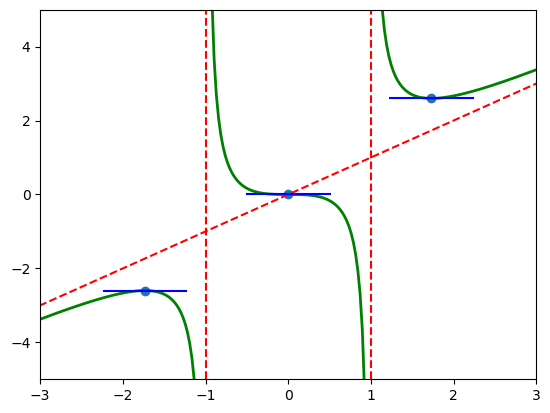

In [61]:
plt.figure()
plt.plot(X,Y,'g',linewidth=2)
plt.plot([-1,-1],[-5,5],'r--')
plt.plot([1,1],[-5,5],'r--')
plt.plot([-4,4],[-4,4],'r--')
plt.scatter([-np.sqrt(3),0,np.sqrt(3)],[f(-np.sqrt(3)),f(0),f(np.sqrt(3))])
plt.plot((-.5, .5), (0, 0), 'b-')
plt.plot((-np.sqrt(3)-.5, -np.sqrt(3)+.5), (f(-np.sqrt(3)), f(-np.sqrt(3))), 'b-')
plt.plot((np.sqrt(3)-.5, np.sqrt(3)+.5), (f(np.sqrt(3)), f(np.sqrt(3))), 'b-')
plt.xlim([-3,3])
plt.ylim([-5,5])
plt.show()

# Plot de functie g

Omdat de functie $g$ gebruik maakt van de sympy module om de functie te definiëren, moeten we gebruik maken van 'lambdify' om de Y-waarden te berekenen 

In [62]:
x = sp.symbols('x',real=True)
Y = sp.lambdify(x,g(x),'numpy')(X)

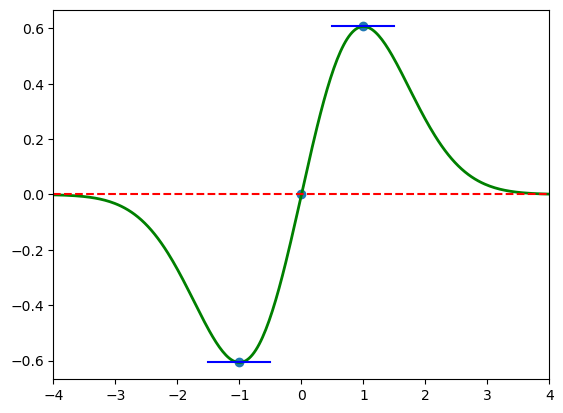

In [63]:
plt.figure()
plt.plot(X,Y,'g',linewidth=2)
plt.plot((-1.5, -0.5), (g(-1), g(-1)), 'b-')
plt.plot((0.5, 1.5), (g(1), g(1)), 'b-')
plt.scatter((-1,0,1),(g(-1),g(0),g(1)))
plt.plot((-4,4),(0,0),'r--')
plt.xlim([-4,4])
plt.show()

Voor het bepalen van de raaklijn in 0, hebben we de afgeleide van de functie nodig:

In [64]:
def Dg(x0): return sp.diff(g(x),x).subs(x,x0)

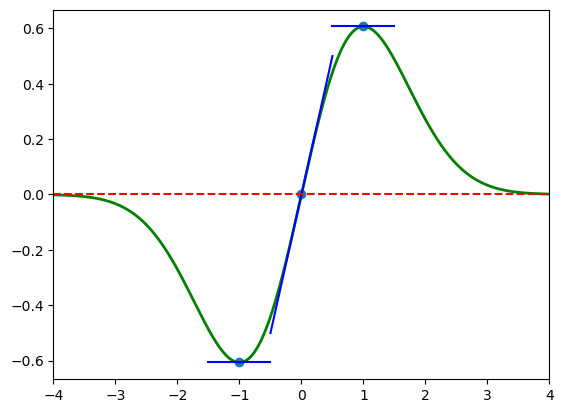

In [65]:
plt.figure()
plt.plot(X,Y,'g',linewidth=2)
plt.plot((-1.5, -0.5), (g(-1), g(-1)), 'b-')
plt.plot((0.5, 1.5), (g(1), g(1)), 'b-')
plt.plot((-0.5,0.5),(Dg(0)*-.5,Dg(0)*.5),'b-')
plt.scatter((-1,0,1),(g(-1),g(0),g(1)))
plt.plot((-4,4),(0,0),'r--')
plt.xlim([-4,4])
plt.show()

# Plot de functie h

In [66]:
def Dh(x0): return sp.diff(h(x),x).subs(x,x0)

In [67]:
X = np.linspace(0,3,300)

In [68]:
Y = sp.lambdify(x,h(x),'numpy')(X)

<lambdifygenerated-6>:2: RuntimeWarning: divide by zero encountered in log
  return log(x)/x**2


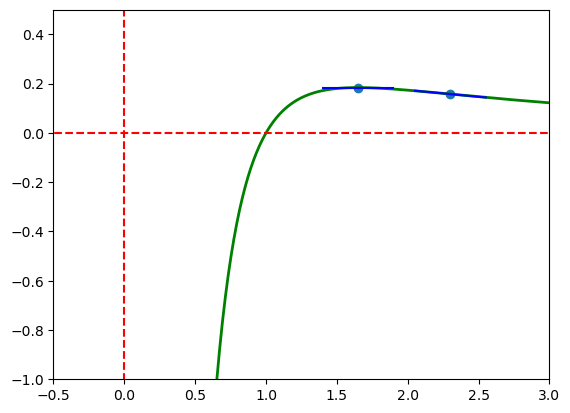

In [69]:
plt.figure()
plt.plot(X,Y,'g',linewidth=2)
plt.plot((0, 0), (-10,10), 'r--')
plt.plot((np.exp(1/2)-0.25, np.exp(1/2)+0.25), (h(np.exp(1/2)),h(np.exp(1/2))), 'b-')
plt.plot((np.exp(5/6)-0.25, np.exp(5/6)+0.25), (h(np.exp(5/6))-.25*Dh(np.exp(5/6)),h(np.exp(5/6))+.25*Dh(np.exp(5/6))), 'b-')
plt.scatter((np.exp(1/2),np.exp(5/6)),((h(np.exp(1/2)),h(np.exp(5/6)))))
plt.plot((-4,4),(0,0),'r--')
plt.xlim([-.5,3])
plt.ylim([-1,.5])
plt.show()